In [210]:
# Import the machine learning libraries.
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn import metrics
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [211]:
# Load the dataset.
# The dataset can be downloaded here: https://www.kaggle.com/mlg-ulb/creditcardfraud.
df = pd.read_csv('/content/drive/My Drive/ML_Code/Credit Fraud Detector/creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [212]:
df.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,-0.284708,-0.612982,-0.066655,-0.732987,0.237948,-0.293959,-0.245496,-0.174846,-0.891169,-0.290491,-0.139512,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,-0.111640,-1.109232,-0.453235,-1.046946,1.122674,1.243518,-1.431897,0.939328,-0.002373,2.894952,0.006666,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,-0.594242,-1.264072,0.453596,-0.243142,-0.858719,-0.766554,-0.644646,0.447184,0.388721,0.792135,0.348176,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,0.267772,0.523316,0.559047,-0.834660,0.626211,-0.541494,0.225361,-0.605252,-0.163049,0.561695,-0.256922,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,-0.657422,0.644837,0.190916,-0.546329,-0.731707,-0.808036,0.599628,0.070441,0.373110,0.128904,0.000676,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [213]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [214]:
# Check Null values.
df.isnull().sum().max()

0

In [215]:
# Count up the Class.
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0.5, 1.0, 'Class Distributions\n (0: Non-Fraud | 1: Fraud)')

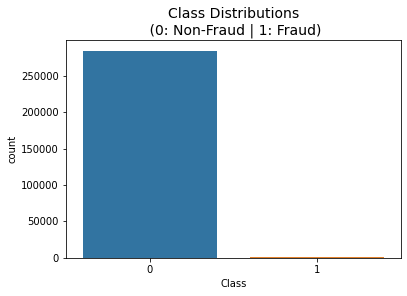

In [216]:
sns.countplot(x='Class', data=df)
plt.title('Class Distributions\n (0: Non-Fraud | 1: Fraud)', fontsize=14)

In [217]:
# The classes are heavily skewed.
print('Non-Frauds Transactions:', round(df['Class'].value_counts()[0]/len(df)*100, 2), '% of the dataset')
print('Frauds Transactions:', round(df['Class'].value_counts()[1]/len(df)*100, 2), '% of the dataset')

Non-Frauds Transactions: 99.83 % of the dataset
Frauds Transactions: 0.17 % of the dataset


In [218]:
# Separate input features and target.
X = df.drop('Class', axis=1)
y = df['Class']

In [219]:
# Split the dataset into the training set and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

###**Dummy Classifier**

In [220]:
from sklearn.dummy import DummyClassifier
# DummyClassifier to predict only target 0.
# This classifier is useful as a simple baseline to compare with other (real) classifiers.
# Do not use it for real problems.
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# Check unique labels.
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# Print Accuracy.
print('Accuracy: ', accuracy_score(y_test, dummy_pred))

# Print F1 Score.
print('F1 Score: ', f1_score(y_test, dummy_pred))
print('F1 Score (macro): ', f1_score(y_test, dummy_pred, average='macro'))
print('F1 Score (micro): ', f1_score(y_test, dummy_pred, average='micro'))
print('F1 Score (weighted): ', f1_score(y_test, dummy_pred, average='weighted'))

Unique predicted labels:  [0]
Accuracy:  0.998230386786888
F1 Score:  0.0
F1 Score (macro):  0.49955720490869987
F1 Score (micro):  0.998230386786888
F1 Score (weighted):  0.9973463637563763


In [221]:
# Check unique values.
predictions = pd.DataFrame(dummy_pred)
predictions[0].value_counts()

0    71202
Name: 0, dtype: int64

In [222]:
# Print classification report.
print(classification_report(y_test, dummy_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71076
           1       0.00      0.00      0.00       126

    accuracy                           1.00     71202
   macro avg       0.50      0.50      0.50     71202
weighted avg       1.00      1.00      1.00     71202



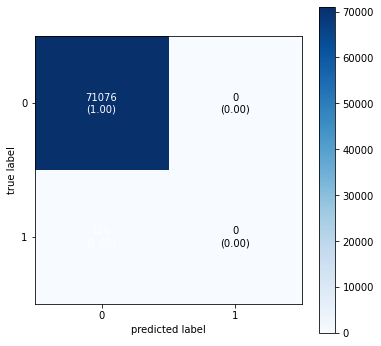

In [223]:
# Plot the confusion matrix.
cm = metrics.confusion_matrix(y_test, dummy_pred)
plot_confusion_matrix(conf_mat=cm,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      figsize=(6,6))
plt.show()

###**Logistic Regression Classifier**

In [224]:
from sklearn.linear_model import LogisticRegression
# Train the Logistic Regression model.
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
 
# Predict the Test set.
lr_pred = lr.predict(X_test)

# Print Accuracy.
print('Accuracy: ', accuracy_score(y_test, lr_pred))

# Print F1 Score.
print('F1 Score: ', f1_score(y_test, lr_pred))
print('F1 Score (macro): ', f1_score(y_test, lr_pred, average='macro'))
print('F1 Score (micro): ', f1_score(y_test, lr_pred, average='micro'))
print('F1 Score (weighted): ', f1_score(y_test, lr_pred, average='weighted'))

Accuracy:  0.9988202578579254
F1 Score:  0.6315789473684211
F1 Score (macro):  0.8154940651764455
F1 Score (micro):  0.9988202578579254
F1 Score (weighted):  0.9987582657393418


In [225]:
# Check unique values.
predictions = pd.DataFrame(lr_pred)
predictions[0].value_counts()

0    71100
1      102
Name: 0, dtype: int64

In [226]:
# Print classification report.
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71076
           1       0.71      0.57      0.63       126

    accuracy                           1.00     71202
   macro avg       0.85      0.79      0.82     71202
weighted avg       1.00      1.00      1.00     71202



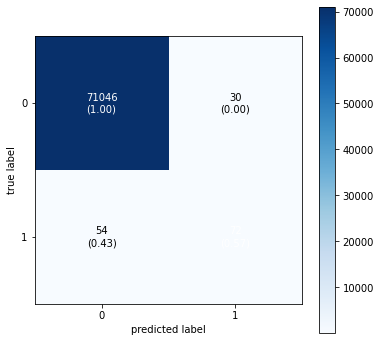

In [227]:
# Plot the confusion matrix.
cm = metrics.confusion_matrix(y_test, lr_pred)
plot_confusion_matrix(conf_mat=cm,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      figsize=(6,6))
plt.show()

###**Random Forest Classifier**

In [228]:
from sklearn.ensemble import RandomForestClassifier
# Train Random Forest model.
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# Predict the Test set.
rfc_pred = rfc.predict(X_test)

# Print Accuracy.
print('Accuracy: ', accuracy_score(y_test, rfc_pred))

# Print F1 Score.
print('F1 Score: ', f1_score(y_test, rfc_pred))
print('F1 Score (macro): ', f1_score(y_test, rfc_pred, average='macro'))
print('F1 Score (micro): ', f1_score(y_test, rfc_pred, average='micro'))
print('F1 Score (weighted): ', f1_score(y_test, rfc_pred, average='weighted'))

Accuracy:  0.9995365298727564
F1 Score:  0.8571428571428571
F1 Score (macro):  0.9284553727802445
F1 Score (micro):  0.9995365298727564
F1 Score (weighted):  0.9995154972777677


In [229]:
# Print classification report.
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71076
           1       0.94      0.79      0.86       126

    accuracy                           1.00     71202
   macro avg       0.97      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202



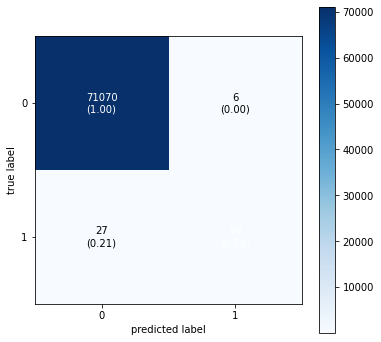

In [230]:
# Plot the confusion matrix.
cm = metrics.confusion_matrix(y_test, rfc_pred)
plot_confusion_matrix(conf_mat=cm,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      figsize=(6,6))
plt.show()

###**Oversampling Minority Class**

In [231]:
from sklearn.utils import resample

In [232]:
# Separate input features and target.
X = df.drop('Class', axis=1)
y = df.Class

# Split the dataset into the training set and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [233]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(213605, 30) (71202, 30) (213605,) (71202,)


In [234]:
# Summarize the new class distribution.
counter = Counter(y_train)
print(counter)

Counter({0: 213239, 1: 366})


In [235]:
# Concatenate our training data back together.
X = pd.concat([X_train, y_train], axis=1)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
216156,140363.0,0.697391,0.920464,-0.983066,0.441747,1.435830,-0.349617,1.405622,-0.594220,-0.620746,0.358705,-1.175333,-0.730615,-0.152816,0.737250,1.690724,-1.656995,0.366163,0.150465,2.979409,0.257816,0.212836,0.990386,-0.260455,0.110082,-0.687916,0.506654,0.069928,0.010637,7.99,0
56283,47351.0,1.056269,-0.007179,0.629408,1.281787,-0.100303,0.790461,-0.326872,0.351898,0.266958,-0.036112,1.271796,1.282812,-0.333142,0.134001,-0.640739,-0.797293,0.321995,-0.793186,-0.473123,-0.214671,0.048048,0.415388,-0.074945,-0.268436,0.556263,-0.229428,0.066250,0.005222,9.99,0
179257,123988.0,-0.367100,-0.218085,0.240456,-1.724943,-0.223758,-0.313142,0.068178,-0.044737,-0.773226,-0.106758,0.796307,-0.309636,0.334820,-1.778761,-0.738251,2.030377,0.481228,-0.235662,0.750811,-0.137747,-0.056749,-0.061931,0.305545,-0.619282,-0.655443,-0.556643,-0.046258,0.005693,81.00,0
280876,169807.0,2.122936,-0.911088,-1.494615,-0.956583,-0.449632,-0.821246,-0.351636,-0.170963,-0.541995,0.973230,0.553830,-0.454101,-1.131138,0.398249,-0.813887,0.915524,0.148500,-1.209412,1.163919,-0.043614,0.070168,0.081033,0.129478,-0.415564,-0.066561,-0.272814,-0.055386,-0.073655,47.28,0
144267,85985.0,1.260732,0.264732,0.515558,0.618121,-0.460678,-0.985884,0.075443,-0.216739,0.015002,-0.071587,-0.185450,0.474423,0.516096,0.199194,1.010181,0.294627,-0.435983,-0.565538,-0.118683,-0.080303,-0.255418,-0.728789,0.133552,0.380217,0.224799,0.094191,-0.027753,0.019406,1.79,0


In [236]:
# Separate minority (Fraud Transactions) and majority (Non-Fraud Transctions) classes.
not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

# Upsample minority.
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# Combine majority and upsampled minority.
upsampled = pd.concat([not_fraud, fraud_upsampled])

# Check new class counts.
upsampled.Class.value_counts()

1    213239
0    213239
Name: Class, dtype: int64

Text(0.5, 1.0, 'Class Distributions\n (0: Non-Fraud | 1: Fraud)')

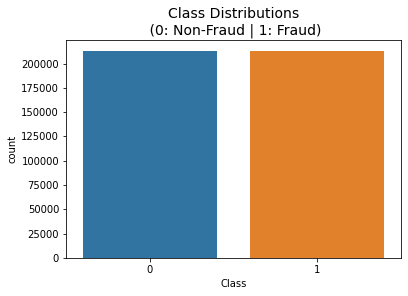

In [237]:
sns.countplot(x='Class', data=upsampled)
plt.title('Class Distributions\n (0: Non-Fraud | 1: Fraud)', fontsize=14)

In [238]:
# Try logistic regression again with the balanced dataset.
X_train = upsampled.drop('Class', axis=1)
y_train = upsampled.Class

upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)

In [239]:
# Print Accuracy.
print('Accuracy: ', accuracy_score(y_test, upsampled_pred))

# Print F1 Score.
print('F1 Score: ', f1_score(y_test, upsampled_pred))
print('F1 Score (macro): ', f1_score(y_test, upsampled_pred, average='macro'))
print('F1 Score (micro): ', f1_score(y_test, upsampled_pred, average='micro'))
print('F1 Score (weighted): ', f1_score(y_test, upsampled_pred, average='weighted'))

Accuracy:  0.9729361534788349
F1 Score:  0.10662957811775615
F1 Score (macro):  0.5464447668837157
F1 Score (micro):  0.9729361534788349
F1 Score (weighted):  0.9847033501109402


In [240]:
# Print classification report.
print(classification_report(y_test, upsampled_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     71076
           1       0.06      0.91      0.11       126

    accuracy                           0.97     71202
   macro avg       0.53      0.94      0.55     71202
weighted avg       1.00      0.97      0.98     71202



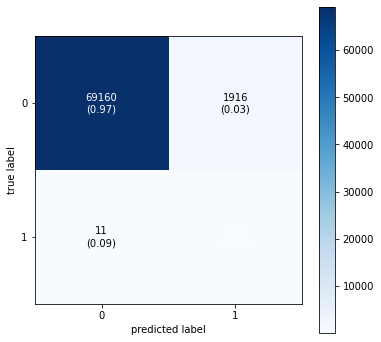

In [241]:
# Plot the confusion matrix.
cm = metrics.confusion_matrix(y_test, upsampled_pred)
plot_confusion_matrix(conf_mat=cm,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      figsize=(6,6))
plt.show()

###**Undersampling Majority Class**

In [242]:
# Still using our separated classes Fraud and Non-Fraud from above.

# Downsample majority.
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 7) # reproducible results

# Combine minority and downsampled majority.
downsampled = pd.concat([not_fraud_downsampled, fraud])

# Check counts.
downsampled.Class.value_counts()

1    366
0    366
Name: Class, dtype: int64

Text(0.5, 1.0, 'Class Distributions\n (0: Non-Fraud | 1: Fraud)')

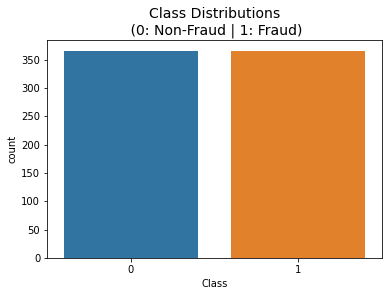

In [243]:
sns.countplot(x='Class', data=downsampled)
plt.title('Class Distributions\n (0: Non-Fraud | 1: Fraud)', fontsize=14)

In [244]:
# Try logistic regression again with the balanced dataset.
X_train = downsampled.drop('Class', axis=1)
y_train = downsampled.Class

undersampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

undersampled_pred = undersampled.predict(X_test)

In [245]:
# Print Accuracy.
print('Accuracy: ', accuracy_score(y_test, undersampled_pred))

# Print F1 Score.
print('F1 Score: ', f1_score(y_test, undersampled_pred))
print('F1 Score (macro): ', f1_score(y_test, undersampled_pred, average='macro'))
print('F1 Score (micro): ', f1_score(y_test, undersampled_pred, average='micro'))
print('F1 Score (weighted): ', f1_score(y_test, undersampled_pred, average='weighted'))

Accuracy:  0.9719670795764164
F1 Score:  0.10332434860736747
F1 Score (macro):  0.5445426548355788
F1 Score (micro):  0.9719670795764164
F1 Score (weighted):  0.9841993895746537


In [246]:
# Print classification report.
print(classification_report(y_test, undersampled_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     71076
           1       0.05      0.91      0.10       126

    accuracy                           0.97     71202
   macro avg       0.53      0.94      0.54     71202
weighted avg       1.00      0.97      0.98     71202



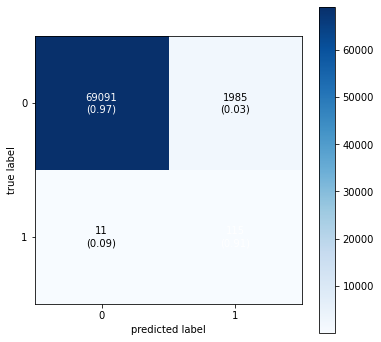

In [247]:
# Plot the confusion matrix.
cm = metrics.confusion_matrix(y_test, undersampled_pred)
plot_confusion_matrix(conf_mat=cm,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      figsize=(6,6))
plt.show()

###**Generate Synthetic Samples**

In [248]:
from imblearn.over_sampling import SMOTE # SMOTE or Synthetic Minority Oversampling Technique

# Separate input features and target.
X = df.drop('Class', axis=1)
y = df.Class

# Split the dataset into the training set and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

sm = SMOTE(random_state=7, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [249]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(426478, 30) (71202, 30) (426478,) (71202,)


In [250]:
# Summarize the new class distribution.
counter = Counter(y_train)
print(counter)

Counter({0: 213239, 1: 213239})


In [251]:
smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)

smote_pred = smote.predict(X_test)

# Print Accuracy.
print('Accuracy: ', accuracy_score(y_test, smote_pred))

# Print F1 Score.
print('F1 Score: ', f1_score(y_test, smote_pred))
print('F1 Score (macro): ', f1_score(y_test, smote_pred, average='macro'))
print('F1 Score (micro): ', f1_score(y_test, smote_pred, average='micro'))
print('F1 Score (weighted): ', f1_score(y_test, smote_pred, average='weighted'))

Accuracy:  0.9842841493216483
F1 Score:  0.16926503340757237
F1 Score (macro):  0.5806660350687025
F1 Score (micro):  0.9842841493216483
F1 Score (weighted):  0.9906109954329786


In [252]:
# Print classification report.
print(classification_report(y_test, smote_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71076
           1       0.09      0.90      0.17       126

    accuracy                           0.98     71202
   macro avg       0.55      0.94      0.58     71202
weighted avg       1.00      0.98      0.99     71202



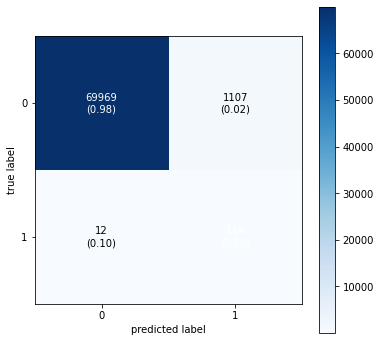

In [253]:
# Plot the confusion matrix.
cm = metrics.confusion_matrix(y_test, smote_pred)
plot_confusion_matrix(conf_mat=cm,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      figsize=(6,6))
plt.show()